# Combined dataframe visualizations

### Overview: 
            - Load Libraries and csvs created from earlier notebooks
            - What players not in the HoF does our model predict have the best chance to reach the HoF (highest likelihood)?
            - Who does our model predict in the HoF is least deserving (lowest likelihood)?
            - What is the HoF likelihood associated with steroid related players?
            - Steroid tied players that should and should not make the hall of fame
            

In [9]:
import pandas as pd
import numpy as np 
from plotnine import *
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

dfO = pd.read_csv('~/jupyter/cs2019_Group4/GroupProducts/dfOlog')
dfP = pd.read_csv('~/jupyter/cs2019_Group4/GroupProducts/dfPlog')
dfC = pd.read_csv('~/jupyter/cs2019_Group4/GroupProducts/dfClog')

Create one single dataframe that contains all players

In [10]:
df = pd.concat([dfO, dfP,dfC], axis=0, ignore_index = True, sort=False)

## Visualizations

Show a visualization of active players and their HoF likelihood with a threshold of greater than 50% depicting future induction

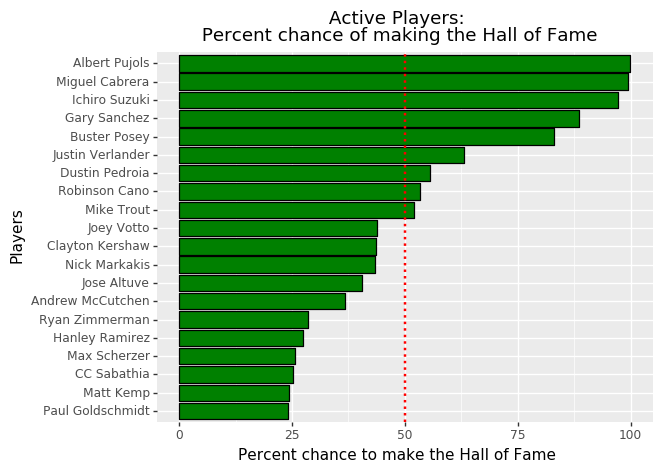

<ggplot: (-9223363276312877347)>

In [11]:
bot_df = df[df['ActiveFlag'] == 1].sort_values(by='hof_perc', ascending=False).head(20)
bot_df_list = bot_df.sort_values(by='hof_perc', ascending=True)['fullName'].tolist()
bot_df_cat = pd.CategoricalDtype(categories=bot_df_list, ordered=True)
bot_df['name_cat'] = bot_df['fullName'].astype(str).astype(bot_df_cat)

g1 = ggplot(bot_df, aes(x='name_cat', y='hof_perc'))  + geom_bar(stat='identity', color='black',fill='green') + coord_flip()
g1 = g1 + ylab("Percent chance to make the Hall of Fame") + xlab("Players")
g1 = g1 + ggtitle(" Active Players: \n Percent chance of making the Hall of Fame")
g1 + geom_hline(yintercept = 50, linetype="dotted", color="red",size = 1)

Create a subset for players that have not been inducted into the HoF yet

In [12]:
noninducted_players = df[df['inducted'] == 0]
#inducted_players[inducted_players['HOFeligible'] == 1]

Show a visualization of inactive players and their HoF likelihood with a threshold of greater than 50% depicting future induction

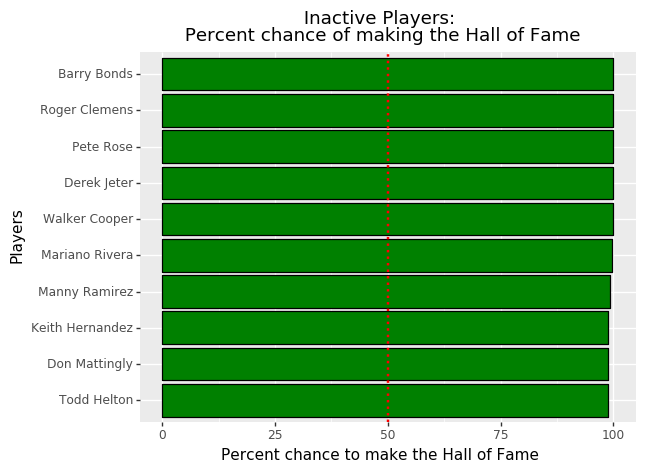

<ggplot: (8760541887457)>

In [13]:
bot_df = noninducted_players[noninducted_players['HOFeligible'] == 1].sort_values(by='hof_perc', ascending=False).head(10)
bot_df_list = bot_df.sort_values(by='hof_perc', ascending=True)['fullName'].tolist()
bot_df_cat = pd.CategoricalDtype(categories=bot_df_list, ordered=True)
bot_df['name_cat'] = bot_df['fullName'].astype(str).astype(bot_df_cat)

g1 = ggplot(bot_df, aes(x='name_cat', y='hof_perc'))  + geom_bar(stat='identity', color='black',fill='green') + coord_flip()
g1 = g1 + ylab("Percent chance to make the Hall of Fame") + xlab("Players")
g1 = g1 + ggtitle(" Inactive Players: \n Percent chance of making the Hall of Fame")
g1 + geom_hline(yintercept = 50, linetype="dotted", color="red",size = 1)

Show a visualization of current HoFers and their HoF likelihood with a threshold of greater than 50% depicting those who actually derserved HoF induction

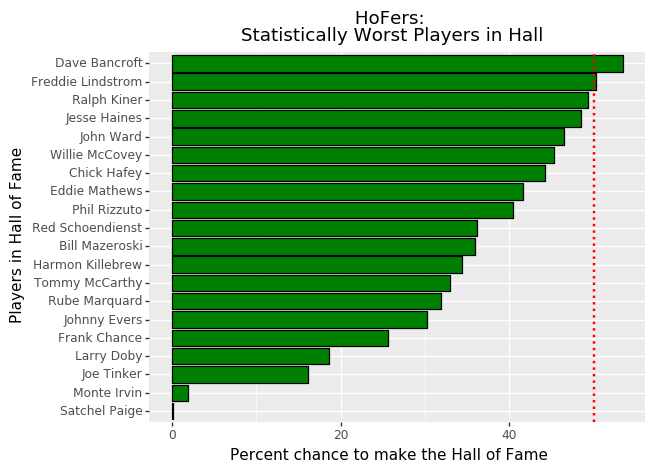

<ggplot: (8760567404948)>

In [14]:
bot_df = df[df['inducted'] == 1].sort_values(by='hof_perc', ascending=True).head(20)
bot_df_list = bot_df.sort_values(by='hof_perc', ascending=True)['fullName'].tolist()
bot_df_cat = pd.CategoricalDtype(categories=bot_df_list, ordered=True)
bot_df['name_cat'] = bot_df['fullName'].astype(str).astype(bot_df_cat)

g1 = ggplot(bot_df, aes(x='name_cat', y='hof_perc'))  + geom_bar(stat='identity', color='black',fill='green') + coord_flip()
g1 = g1 + ylab("Percent chance to make the Hall of Fame") + xlab("Players in Hall of Fame")
g1 = g1 + ggtitle(" HoFers: \n Statistically Worst Players in Hall")
g1 + geom_hline(yintercept = 50, linetype="dotted", color="red",size = 1)

According to our model, only Dave Bancroft and Freddie Lindstrom were deserving of their HoF nod

Show a visualization of players linked to steroids and their HoF likelihood with a threshold of greater than 50% depicting future induction

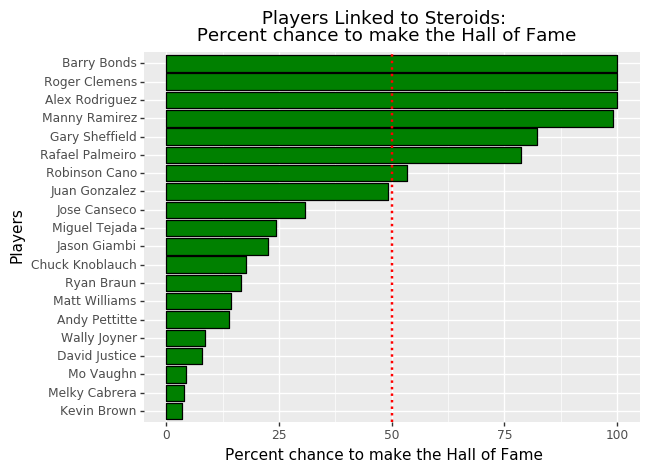

<ggplot: (8760550871991)>

In [15]:
bot_df = df[df['Linked to Steroids'] == 1].sort_values(by='hof_perc', ascending=False).head(20)
bot_df_list = bot_df.sort_values(by='hof_perc', ascending=True)['fullName'].tolist()
bot_df_cat = pd.CategoricalDtype(categories=bot_df_list, ordered=True)
bot_df['name_cat'] = bot_df['fullName'].astype(str).astype(bot_df_cat)

g1 = ggplot(bot_df, aes(x='name_cat', y='hof_perc'))  + geom_bar(stat='identity', color='black',fill='green') + coord_flip()
g1 = g1 + ylab("Percent chance to make the Hall of Fame") + xlab("Players")
g1 = g1 + ggtitle(" Players Linked to Steroids: \n Percent chance to make the Hall of Fame")
g1 + geom_hline(yintercept = 50, linetype="dotted", color="red",size = 1)

In [16]:
w = df[df['inducted'] == 1]
w[w['Linked to Steroids']== 1]
#df[df['Linked to Steroids'] == 1].sort_values(by='hof_perc', ascending=False).head(30)

,playerID,fullName,hof_perc,hof_proj,inducted,InnOuts,FPCT,RF,TC,ActiveFlag,...,K/9,BB/9,HR/9,K:BB,K%,BB%,I/GS,W%,CSP,CPCT


Shows no players linked to steroids are in the Hall of Fame